# **1. Which products are most popular in each market region or cluster?**

In [ ]:
import pandas as pd

data1 = pd.read_csv('/content/sample_data/csv1.csv')
data1

TerritoryName CountryRegionCode              ProductName  PopularRate
0       Australia                AU    Water Bottle - 30 oz.    21.568627
1          Canada                CA    Water Bottle - 30 oz.    32.329441
2         Central                US             AWC Logo Cap    44.117647
3          France                FR    Water Bottle - 30 oz.    18.592677
4         Germany                DE    Water Bottle - 30 oz.    21.588946
5       Northeast                US             AWC Logo Cap    47.368421
6       Northwest                US    Water Bottle - 30 oz.    20.403250
7       Southeast                US  Sport-100 Helmet, Black    32.222222
8       Southwest                US    Water Bottle - 30 oz.    21.316329
9  United Kingdom                GB    Water Bottle - 30 oz.    25.013333

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TerritoryName      10 non-null     object 
 1   CountryRegionCode  10 non-null     object 
 2   ProductName        10 non-null     object 
 3   PopularRate        10 non-null     float64
dtypes: float64(1), object(3)
memory usage: 448.0+ bytes


**Preprocessing data1**

In [ ]:
# Combine columns into 'Territory'
data1['Territory'] = data1['TerritoryName'] + ' (' + data1['CountryRegionCode'] + ')'

# Delete original columns
data1 = data1.drop(['TerritoryName', 'CountryRegionCode'], axis=1)

In [ ]:
data1.describe()

PopularRate
count    10.000000
mean     28.452089
std      10.283243
min      18.592677
25%      21.379404
50%      23.301140
75%      32.302636
max      47.368421

In [ ]:
data1

ProductName  PopularRate            Territory
0    Water Bottle - 30 oz.    21.568627       Australia (AU)
1    Water Bottle - 30 oz.    32.329441          Canada (CA)
2             AWC Logo Cap    44.117647         Central (US)
3    Water Bottle - 30 oz.    18.592677          France (FR)
4    Water Bottle - 30 oz.    21.588946         Germany (DE)
5             AWC Logo Cap    47.368421       Northeast (US)
6    Water Bottle - 30 oz.    20.403250       Northwest (US)
7  Sport-100 Helmet, Black    32.222222       Southeast (US)
8    Water Bottle - 30 oz.    21.316329       Southwest (US)
9    Water Bottle - 30 oz.    25.013333  United Kingdom (GB)

from matplotlib import pyplot as plt
data1['PopularRate'].plot(kind='hist', bins=20, title='PopularRate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data1.groupby('ProductName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data1['PopularRate'].plot(kind='line', figsize=(8, 4), title='PopularRate')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data1['ProductName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data1, x='PopularRate', y='ProductName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Plotting data1**

<ipython-input-28-f8c500377370>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('rainbow', len(unique_products))


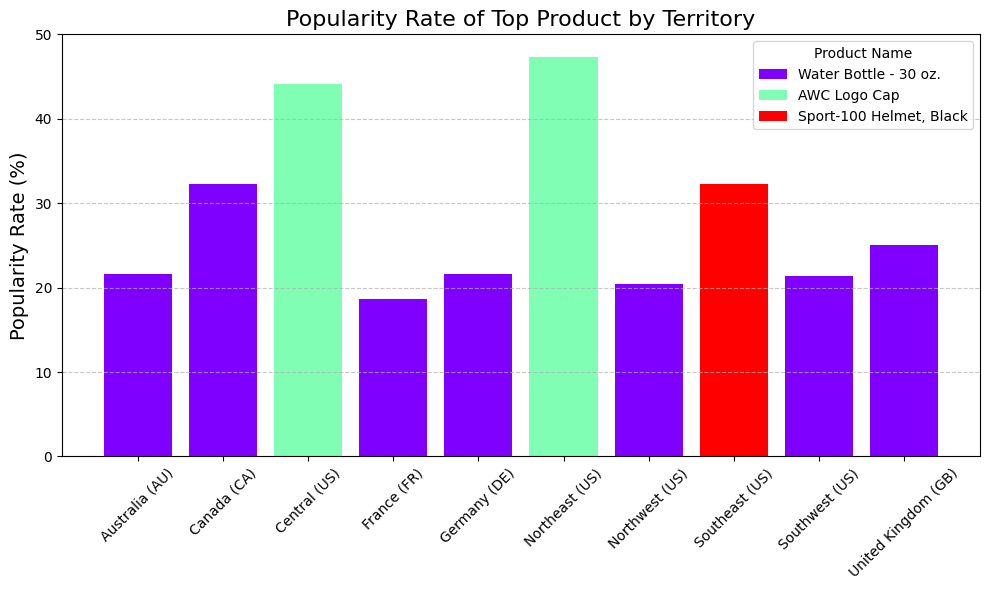

In [ ]:
import pandas as pd

territory = data1['Territory']
popular_rate = data1['PopularRate']
product = data1['ProductName']

plt.figure(figsize=(10, 6))
unique_products = data1['ProductName'].unique()
colors = plt.cm.get_cmap('rainbow', len(unique_products))


product_colors = {product: colors(i) for i, product in enumerate(unique_products)}


for territory, popular_rate, product in zip(data1['Territory'], data1['PopularRate'], data1['ProductName']):
    plt.bar(territory, popular_rate, color=product_colors[product], label=product)

plt.title('Popularity Rate of Top Product by Territory', fontsize=16)
plt.xlabel('')
plt.ylabel('Popularity Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 50)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend to show product-color mapping
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Get unique labels and handles
plt.legend(by_label.values(), by_label.keys(), title='Product Name')  # Show legend with unique entries

plt.tight_layout()
plt.show()

# **Chart Analysis**
The bar chart represents the "Popularity Rate of Top Product by Territory," comparing three products across various regions. Here’s an analysis:

1. Key Observations:

- Product Categories:

 + Water Bottle - 30 oz. (purple bars) is the most consistent product, with popularity rates generally ranging between 18% and 32% across territories.
 + AWC Logo Cap (green bar) dominates in the Central (US) region with a remarkable 44.12% popularity rate, the highest among all products and territories.
 + Sport-100 Helmet, Black (red bar) has a notable popularity rate of 32.22% in Southeast (US) but is absent from other territories.
- Territory-Based Insights:

 + Australia (AU), France (FR), Germany (DE), and Northwest (US): These regions show lower popularity rates for all products (below 25%).
 + Canada (CA) and United Kingdom (GB) have moderate popularity, particularly favoring the Water Bottle.
 + Central (US) shows an exceptional preference for the AWC Logo Cap.
 + Southeast (US) uniquely favors the Sport-100 Helmet, with a popularity rate slightly higher than 30%.
- Diverse Preferences:

 + Central (US) and Southeast (US) regions have clear product-specific preferences, showcasing distinct top products.
 + Other regions show more balanced distributions, particularly favoring the Water Bottle.
2. Insights:
- AWC Logo Cap could be further marketed in regions with lower popularity, such as Canada and the UK.
- The Sport-100 Helmet might find expansion opportunities in territories outside the Southeast (US) where it has no significant presence.
- Water Bottle - 30 oz. maintains a steady presence and could be positioned as the universally appealing product.



# **2. How does product demand vary across territories?**

In [1]:
import pandas as pd

data2 = pd.read_csv('/content/sample_data/csv2.csv')
data2.head()

TerritoryName CountryRegionCode                  ProductName  OrderQty
0       Northwest                US             Road-450 Red, 44    591360
1  United Kingdom                GB             Road-650 Red, 58    238920
2       Northeast                US       Mountain-200 Black, 38    100344
3  United Kingdom                GB  HL Touring Frame - Blue, 54    382272
4       Northwest                US                 ML Road Tire   2090880

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TerritoryName      2436 non-null   object
 1   CountryRegionCode  2436 non-null   object
 2   ProductName        2436 non-null   object
 3   OrderQty           2436 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 76.2+ KB


**Processing data2**


In [2]:
# Combine columns into 'Territory'
data2['Territory'] = data2['TerritoryName'] + ' (' + data2['CountryRegionCode'] + ')'

# Delete original columns
data2 = data2.drop(['TerritoryName', 'CountryRegionCode'], axis=1)
data2.head()

ProductName  OrderQty            Territory
0             Road-450 Red, 44    591360       Northwest (US)
1             Road-650 Red, 58    238920  United Kingdom (GB)
2       Mountain-200 Black, 38    100344       Northeast (US)
3  HL Touring Frame - Blue, 54    382272  United Kingdom (GB)
4                 ML Road Tire   2090880       Northwest (US)

**Plotting data**

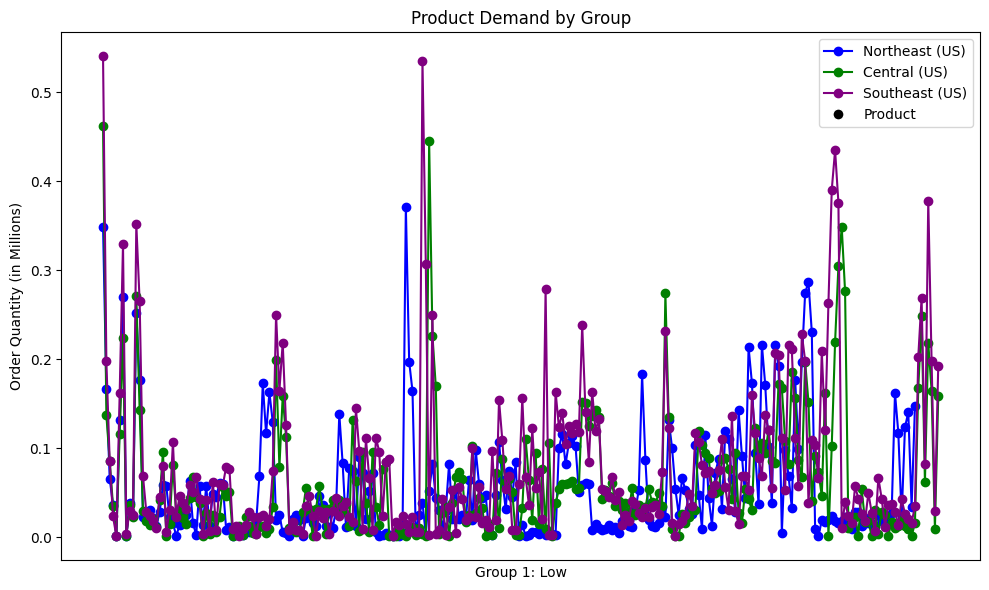

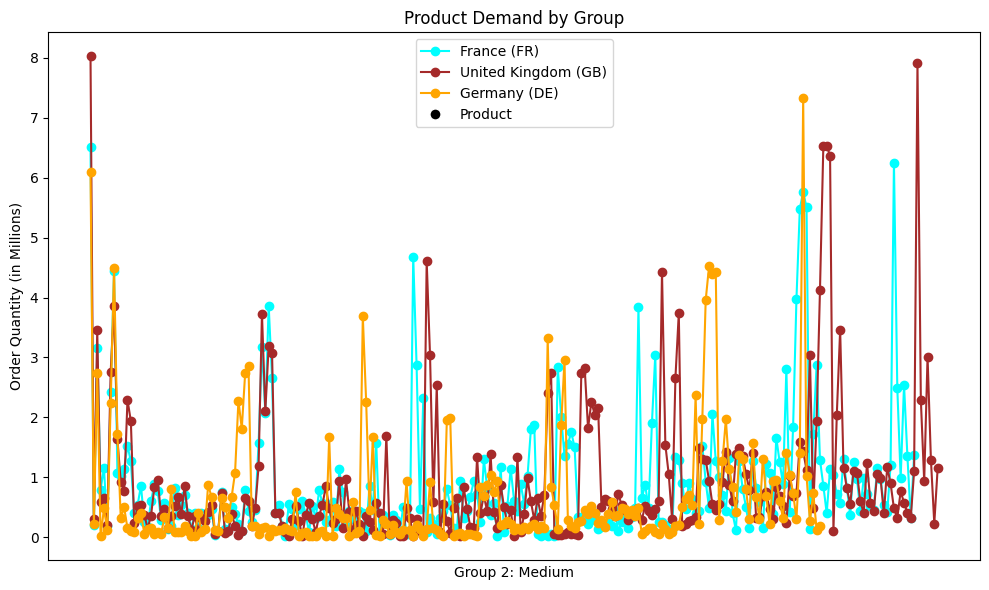

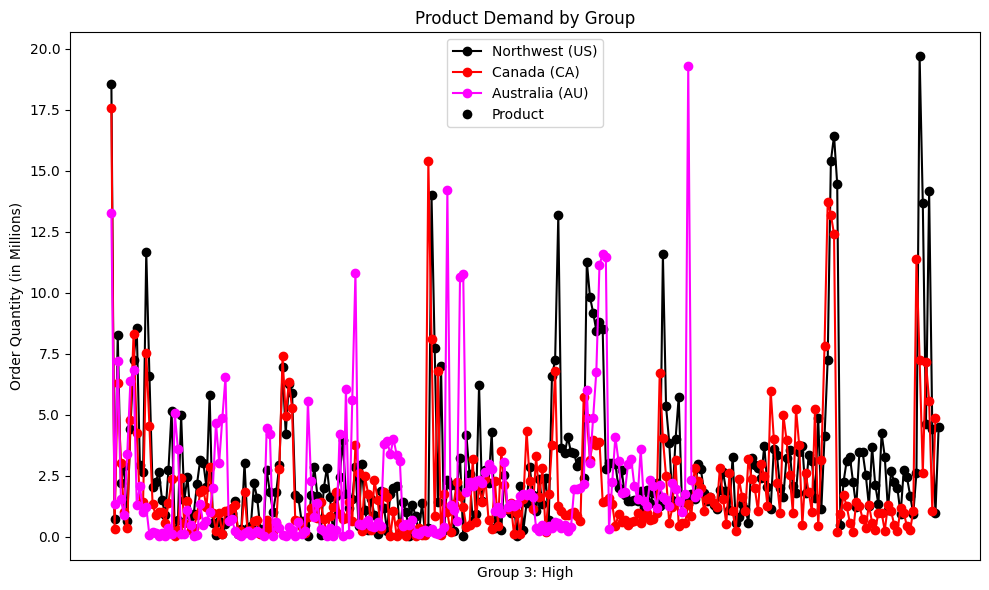

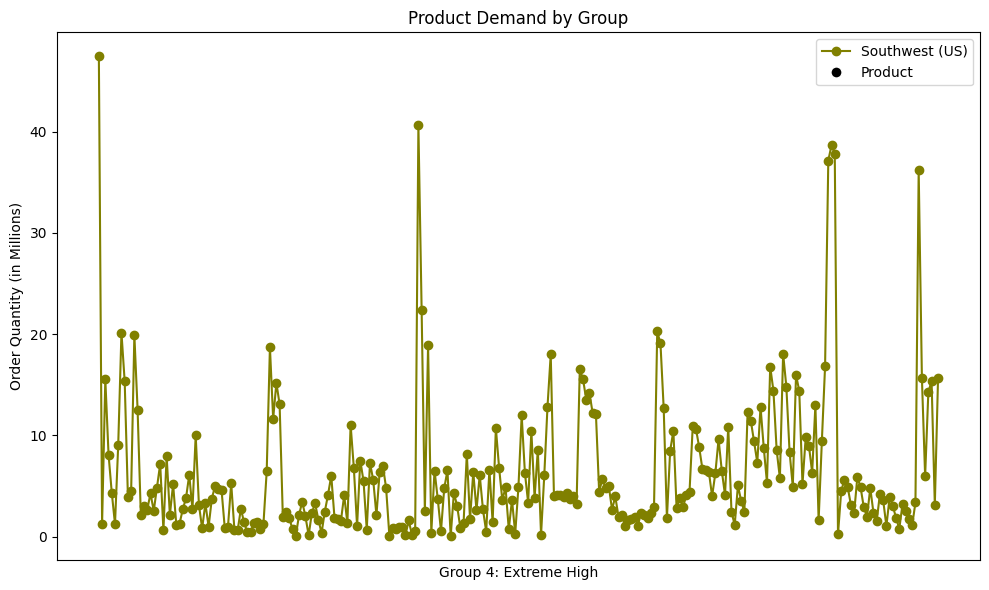

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data2' is your DataFrame with 'Territory', 'ProductName', and 'OrderQty' columns

# Define territory groups and colors
group_1 = ['Northeast (US)', 'Central (US)', 'Southeast (US)']
group_2 = ['France (FR)', 'United Kingdom (GB)', 'Germany (DE)']
group_3 = ['Northwest (US)', 'Canada (CA)', 'Australia (AU)']
group_4 = ['Southwest (US)']

# Customize colors for each territory
colors = {
    'Northeast (US)': 'blue',
    'Central (US)': 'green',
    'Southeast (US)': 'purple',
    'Germany (DE)': 'orange',
    'France (FR)': 'cyan',
    'Australia (AU)': 'magenta',
    'United Kingdom (GB)': 'brown',
    'Northwest (US)': 'black',
    'Southwest (US)': 'olive',
    'Canada (CA)': 'red',
}

# Function to create line chart for a group of territories
def create_line_chart(group, group_name):
    plt.figure(figsize=(10, 6))
    for territory in group:
        territory_data = data2[data2['Territory'] == territory]
        product_totals = territory_data.groupby('ProductName')['OrderQty'].sum().reset_index()

        # Convert OrderQty to millions
        product_totals['OrderQty'] = product_totals['OrderQty'] / 1e6

        plt.plot(product_totals.index, product_totals['OrderQty'],
                 marker='o', linestyle='-', color=colors[territory], label=territory)

    plt.xlabel(group_name)  # Set x-axis label as group name
    plt.ylabel('Order Quantity (in Millions)')  # Updated y-axis label
    plt.title('Product Demand by Group')  # Set the title
    plt.xticks([])  # Remove x-axis ticks

    # Get the legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()

    # Add a new entry for the marker explanation
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label='Product',
                              markerfacecolor='k', markersize=8))

    # Display the legend with the new entry
    plt.legend(handles=handles)

    # Format y-axis to avoid scientific notation ('e')
    plt.ticklabel_format(style='plain', axis='y')

    plt.tight_layout()
    plt.show()

# Create charts for each group
create_line_chart(group_1, 'Group 1: Low')
create_line_chart(group_2, 'Group 2: Medium')
create_line_chart(group_3, 'Group 3: High')
create_line_chart(group_4, 'Group 4: Extreme High')

# **Chart Analysis**
The line graphs display product demand categorized by groups (Low, Medium, High, and Extreme High) across various regions. Here's an analysis:

1. Group 4: Extreme High
- Key Characteristics: Demand spikes are highly pronounced, with some regions exceeding 40 million units.
- Region Focus: The Southwest (US) dominates, as indicated by the bright yellow trend.
- Variability: There is significant fluctuation, with frequent peaks and troughs, suggesting volatile demand patterns.
2. Group 3: High
- Regions Represented: Northwest (US), Canada (CA), Australia (AU).
- Demand Range: Peaks reach up to approximately 20 million units, but overall demand is less extreme compared to Group 4.
- Observation: Canada's demand shows multiple sharp increases, followed closely by Australia's variability.
- Consistency: While there are fluctuations, the trends are less erratic compared to Group 4.
3. Group 1: Low
- Regions Represented: Northeast (US), Central (US), Southeast (US).
- Demand Range: Peaks do not exceed 0.5 million units, indicating a relatively lower and stable demand.
- Trends: Fluctuations are minor, and the data is tightly clustered, suggesting steadier consumption patterns in these regions.
- Comparison: Demand variability is minimal compared to other groups.
4. Group 2: Medium
- Regions Represented: France (FR), United Kingdom (GB), Germany (DE).
- Demand Range: Peaks up to 8 million units, with consistent moderate demand across regions.
- Insights: France exhibits the highest spikes, while Germany and the UK have relatively subdued demand fluctuations.
- Balanced Trends: The group shows a balance between volatility and stability.
5. General Insights:
- Demand Fluctuations: Higher group levels (e.g., Extreme High, High) show greater variability and larger spikes compared to Medium and Low groups.
- Regional Dominance: Specific regions tend to dominate each group in demand intensity, with Southwest (US) and France standing out for their high peaks.
- Stability: Low demand groups display more consistent patterns, while high demand groups are prone to abrupt changes.